# nmi | spring 2024
## lecture 15 : runge-kutta


### 6.4 runge-kutta


family of ODE solvers that include euler and trapezoid.
</br>


#### 6.4.1 die familie


euler is order one an trapezoid is order two; midpoint is also order two.
</br>


##### <b>midpoint method</b>


\begin{align}
  w_0 &= y_0 \\
  w_{i+1} &= w_i + h\cdot f\left( t_i + \frac{h}{2},w_i + \frac{h}{2}\cdot f(t_i,w_i) \right).
\end{align}
</br>


to verify order, compute local truncation error. (repurposed from 6.2.2, explicit trapezoid, taylor expansion.)
</br></br>

$$y_{i+1} = y_i + hf(t_i,y_i) + \frac{h^2}{2} \left( \frac{\partial f}{\partial t}(t_i,y_i) + \frac{\partial f}{\partial y}(t_i,y_i)f(t_i,y_i) \right) + \frac{h^3}{6}y'''(c).$$
</br>

for local truncation error, assume $w_i = y_i$ and calculate $y_{i+1} - w_{i+1}$.
</br></br>

\begin{align}
  w_{i+1} &= y_i + hf \left( t_i + \frac{h}{2},y_i + \frac{h}{2}f(t_i,y_i) \right) \\
  &= y_i + h \left( f(t_i,w_i) + \frac{h}{2}\frac{\partial f}{\partial t}(t_i,y_i) + \frac{h}{2}f(t_i,y_i)\frac{\partial f}{\partial y}f(t_i,y_i) + \mathcal{O}(h^2) \right) \\
  \\
  &\Downarrow \\
  y_{i+1} - w_{i+1} &= \mathcal{O}(h^3).
\end{align}
</br>

ie, midpoint rule is order two.
</br></br>


##### usw


each RHS function evaluation is called a <b>stage</b> of the method. trapezoid and midpoint are members of the family of two-stage, second-order runge-kutta, having form
</br></br>

$$w_{i+1} = w_i + h \left( 1 - \frac{1}{2\alpha} \right) f(t_i,w_i) + \frac{h}{2\alpha} f(t_i+\alpha h,w_i + \alpha hf(t_i,w_i))$$
</br>

for some $\alpha \ne 0$. $\alpha = 1$ is the explicit trapezoid method and $\alpha = \frac{1}{2}$ is the midpoint method.
</br>


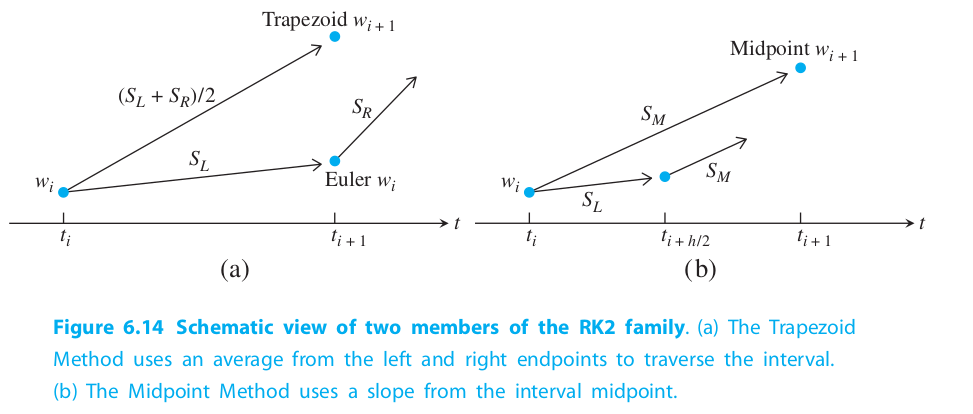

euler approximates using only the slope at the left end of the interval while each of these methods uses an additional slope.
</br>


those are RK2. RK4 is "ubiquitous".
</br>


##### <b>runge-kutta, order 4 (RK4)</b>


\begin{align}
  w_{i+1} &= w_i + \frac{h}{6}(s_1+2s_2+2s_3 + s_4) \quad\text{where} \\
  \\
  s_1 &= f(t_i,w_i) \\
  s_2 &= f(t_i+\frac{h}{2},w_i + \frac{h}{2}s_1) \\
  s_3 &= f(t_i+\frac{h}{2},w_i + \frac{h}{2}s_2) \\
  s_4 &= f(t_i+h,w_i + hs_3).
\end{align}
</br>


bc its simple and requires only an intial condition and yet it is order four. <i>what are the downsides?</i>
</br></br>

RK4s quantity $h(s_1 + 2s_2 + 2s_3 + s_4)/6$ takes the place of slope in euler. ie, its an improved guess for the slope of the interval $[t_i,t_i+h]$ where $s_1$ is the slope of the left end of the interval; $s_2$ is the midpoint slope; $s_3$ is an improved midpoint slope; $s_4$ is an approximate slope for the right end point, $t_i + h$.
</br></br>

Derivation [@wiki](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Derivation_of_the_Runge–Kutta_fourth-order_method)
</br>


RK4 methods converge much faster. convergence here means how fast the global error of the ODE approximation at some fixed time $t$ goes to zero as the step size $h$ goes to zero. order four means that every halving of the step size reduces the error by approximately a factor of $2^4 = 16$.
</br>


##### example 18


example 18 revisits example 01. apply RK4.
</br></br>

\begin{align}
  \textrm{example 18} \quad
  \left\{ \quad
    \begin{array}{l}
      y' = ty + t^3 \\
      y(0) = 1 \\
      t \in [0,1]
    \end{array}
  \right.
\end{align}
</br>

RK45 [@scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.RK45.html) is a hybrid so this one is handcrafted.
</br>


###### code


y, actual = 1.9461638121003846



,n,h,rk4,err
0,5.0,0.200000,1.946140,2.378807e-05
1,10.0,0.100000,1.946162,1.465466e-06
2,20.0,0.050000,1.946164,9.035429e-08
3,40.0,0.025000,1.946164,5.598288e-09
4,80.0,0.012500,1.946164,3.481990e-10
5,160.0,0.006250,1.946164,2.170952e-11
6,320.0,0.003125,1.946164,1.349587e-12
7,640.0,0.001563,1.946164,7.260859e-14


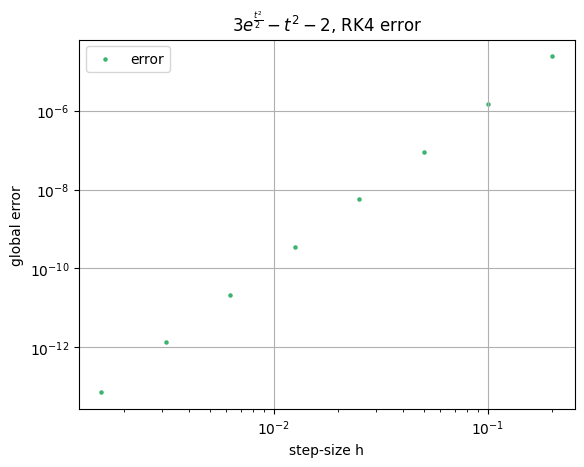

In [ ]:
# eg 18

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# rk4
def rk4_step(t,y,h,ydot):
  s1 = ydot(t,y)
  s2 = ydot(t+h/2,y+h/2*s1)
  s3 = ydot(t+h/2,y+h/2*s2)
  s4 = ydot(t+h,y+h*s3)
  rc = y + h/6*(s1 + 2*s2 + 2*s3 + s4)
  return rc

# f(t,y)
ydot = lambda t,y: t*y + pow(t,3)

# actual
y = lambda t: 3*np.exp(pow(t,2)/2) - pow(t,2) - 2

# interval, h
t = [0.,1.]
n = 5 # [0,n] points
h = (t[1]-t[0])/n

# dataframe = error per step size
kmax = 8
y2 = y(t[1])
print(f"y, actual = {y2}\n")
ds = np.zeros((kmax,4)) # n,h,rk4,error

for k in range(kmax):
  if k > 0:
    n *= 2
    h = (t[1] - t[0])/n
  ds[k,0] = n
  ds[k,1] = h

  # ic
  t1 = t2 = t[0]
  w1 = ic = 1. # y0

  # calc
  for i in range(n):
    t2 += h
    w2 = rk4_step(t1,w1,h,ydot)
    t1 = t2
    w1 = w2

  ds[k,2] = w1
  ds[k,3] = abs(y(t[1])-w1)

# dataframe column names
nCol = ['n','h','rk4','err']

# dataframe from datastore
df = pd.DataFrame(data=ds,columns=nCol)
if True: # spreadsheet
  display(df)

if True: # plot
  ax1  = df.plot(x = "h",y="err",label="error",color="mediumseagreen",marker=".",kind="scatter")
  ax1.set_title("$3e^{\\frac{t^2}{2}} - t^2 - 2$, RK4 error")
  ax1.set_xlabel("step-size h")
  ax1.set_ylabel("global error")
  #ax1.axis((1e-3,2.75e-1,1e-15,1e-4))  ###
  #ax1.set_xscale("log", base=10)       # alternative to loglog()
  #ax1.set_yscale("log", base=10)       ###
  ax1.loglog() # comment out to see without log
  ax1.grid('on',which='major',axis='x')
  ax1.grid('on',which='major',axis='y')
  plt.show()



#### 6.4.2 computer sim: hodgkin-huxley neuron


back in the day when computers where run by hamsters on a flywheel, hodgkin and huxley (not that huxley) developed a [realistic model of neurons firing](https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model). that got them the nobel before any of us were born.
</br></br>

the model is a system of four coupled differential equations: one for voltage difference across the cell wall and three for activation of the ion channels, which exchange sodium and potassium ions that membrane.
</br></br>

<i>im unsure how many mice gave their lives for these equations but science is still pretty dark ages when you think about it.</i>
</br>


<b>hodgkin-huxley equations</b>
</br></br>

\begin{align}
  Cv' &= -g_1m^3h(v-E_1) - g_2n^4(v-E_2) - g_3(v-E_3)+I_{in} \\
  m' &= (1-m)\alpha_m(v-E_0) - m\beta_m(v-E_0) \\
  n' &= (1-n)\alpha_n(v-E_0) - n\beta_n(v-E_0) \\
  h' &= (1-h)\alpha_h(v-E_0) - h\beta_h(v-E_0)
\end{align}
</br>

where
</br></br>

\begin{align}
  \alpha_m(v) &= \frac{2.5 - 0.1v}{e^{2.5-0.1v}-1},\quad \beta_m(v)=4e^{\frac{-v}{18}}, \\
  \alpha_n(v) &= \frac{0.1 - 0.01v}{e^{1.0-0.1v}-1},\quad \beta_n(v)=\frac{1}{8}e^{-\frac{v}{80}}, \\
  \alpha_h(v) &= 0.07e^{-\frac{v}{20}},\quad \beta_h(v)=\frac{1}{e^{^{3-0.1v}+1}}.
\end{align}
</br>

Coefficient $C$ denotes cell capacitance and $I_{in}$ denotes current input from neighboring cells. typical values: capacitance $C = 1\text{ }\mu F$, conductance $g_1 = 120, g_2 = 36, g_3 = 0.3$ siemens ($S$) and voltages $E_0 = -65, E_1 = 50, E_2 = -77, E_3 = -54.4\text{ }mV$.
</br></br>

$v'$ is the current per unit area ($\frac{mA}{cm^2}$) while $g_1,g_2,g_3$ are unitless and $E_1,E_2,E_3$ are "reversal potentials", which are the voltage levels that form the boundary between currents flowing inward and outward.
</br>


###### code


In [ ]:
# Program 6.5 Hodgkin-Huxley equations
# Inputs: time interval inter,
# ic=initial voltage v and 3 gating variables, steps n
# Output: solution y
# Calls a one-step method such as rk4step.m

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# matlab eg
c=1;g1,g2,g3=120,36,0.3        # capacitance;conductance
e0,e1,e2,e3=-65,50,-77,-54.41  # voltages
pa,pb=50,51;pulse=7            # pulse
T=(pa+pb)/2;T_len=pb-pa

# interval, ic
ts = [0,1] #[0,100]
ic = np.array([-65.,0.,0.3,0.6])
n,p = 20,20 #2000,20 # evaluate n, plot p

# ic, datastore
ds = np.zeros((p+1,1+len(ic)))
ds[0,0] = ts[0]
ds[0,1:len(ic)+1] = ic

# rk4, one-step
def rk4_step(t,w,h):
  s1=ydot(t,w)
  s2=ydot(t+h/2,w+h/2*s1)
  s3=ydot(t+h/2,w+h/2*s2)
  s4=ydot(t+h,w+h*s3)
  rc=w+h*(s1+2*s2+2*s3+s4)/6
  return rc

# f(t,y)
def ydot(t,w):
  v,m,n,h = w[0],w[1],w[2],w[3]
  z=np.zeros_like(w)

  iin = pulse*(1-np.sign(abs(t-T)-T_len/2))/2 # square pulse input on [pa,pb]
  z[0]=(iin-g1*pow(m,3)*h*(v-e1)-g2*pow(n,4)*(v-e2)-g3*(v-e3))/c

  #v=v-e0 # huh?
  am = (2.5-0.1*v)/(np.exp(2.5-0.1*v)-1)
  bm = 4*np.exp(-v/18)
  z[1]=(1-m)*am*(v-e0)-m*bm*(v-e0)

  an = (0.1-0.01*v)/(np.exp(1-0.1*v)-1)
  bn = 0.125*np.exp(-v/80)
  z[2]=(1-n)*an*(v-e0)-n*bn*(v-e0)

  ah = 0.07*np.exp(-v/20)
  bh = 1/(np.exp(3-0.1*v)+1)
  z[3]=(1-h)*ah*(v-e0)-h*bh*(v-e0)
  return z

y2=y1=ic
a=ts[0];b=ts[1];h=(b-a)/n # n points to plot
t2=t1=a
for k in range(p):
  for i in range(round(n/p)): # round = lols
    t2 += h
    y2 = rk4_step(t1,y1,h)
    t1,y1 = t2,y2
  ds[k+1,0] = t2
  ds[k+1,1:len(y2)+1] = y2

# dataframe column names
nCol = ["t","v","m","n","h"]

# dataframe from datastore
df = pd.DataFrame(data=ds,columns=nCol)
if True: # spreadsheet
  #df.style # same as below, yawn
  display(df)

if True: # plot
  #subplot(3,1,1);
  #plot([a pa pa pb pb b],[0 0 pulse pulse 0 0]);
  #grid;axis([0 100 0 2*pulse])
  #ylabel(’input pulse’)

  #subplot(3,1,2);
  #plot(t,y(:,1));grid;axis([0 100 -100 100])
  #ylabel(’voltage (mV)’)

  ax3  = df.plot(x = "t",y="m",label="m",color="0.3",marker="o",figsize=(8,1))
  ax31 = df.plot(x = "t",y="n",label="n",ax=ax3,color="mediumseagreen",marker="+")
  ax32 = df.plot(x = "t",y="h",label="h",ax=ax3,color="xkcd:sky blue",marker="x")
  ax3.set_title("conductance")
  ax3.set_xlabel("time (msec)")
  ax3.set_ylabel("gating vars")
  ax3.axis((0,100,0,1))
  ax3.grid('on',which='major',axis='x')
  ax3.grid('on',which='major',axis='y')
  ax3.legend(bbox_to_anchor=(1,1))
  plt.show()

what its supposed to look like but $ydot$ has an error. in my source as well.
</br>

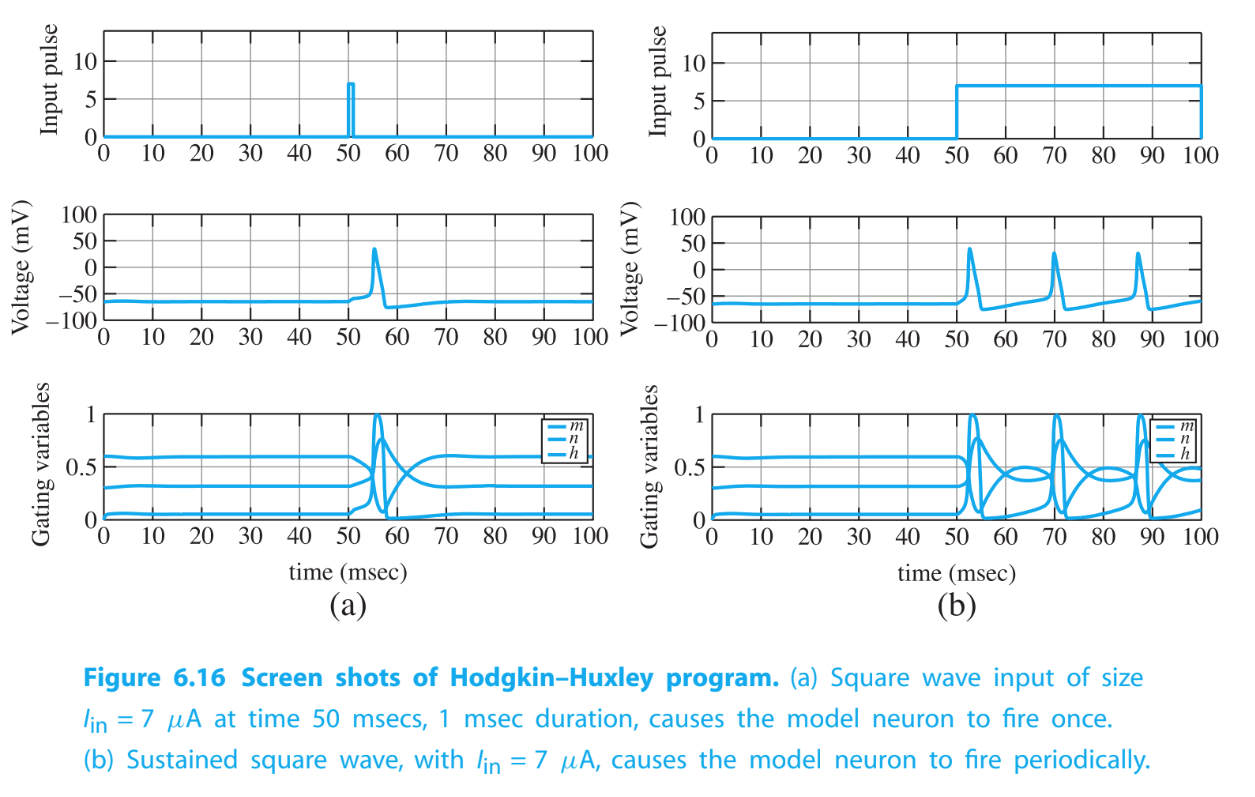

#### 6.4.3 computer sim: lorenz equations


the lorenz equations are a simplification of a miniature atmospheric model designed to study the rayleigh-benard convection, the movement of head in a fluid from a lower warm medium to a higher cool medium.
</br></br>

\begin{align}
  \begin{array}{cl}
    x' &= -sx + sy \\
    y' &= -xz + rx - y \\
    z' &= xy - bz
  \end{array}
  \qquad\Rightarrow\qquad
  \begin{array}{cl}
      x' &= \sigma(y-x) \\
      y' &= x(\rho - z) - y \\
      z' &= xy - \beta z
  \end{array}
\end{align}
</br>

where $x$ is clockwise velocity, $y$ is the temperature differential between the ascending and descending air and $z$ measures the deviation from a strictly linear temperature profile in the vertical direction. the prandtl number $s$, the rayleigh number $r$ and $b$ are the parameters of the system. common settins are $s=10,r=28$ and $b=\frac{8}{3}$.
</br>


###### code


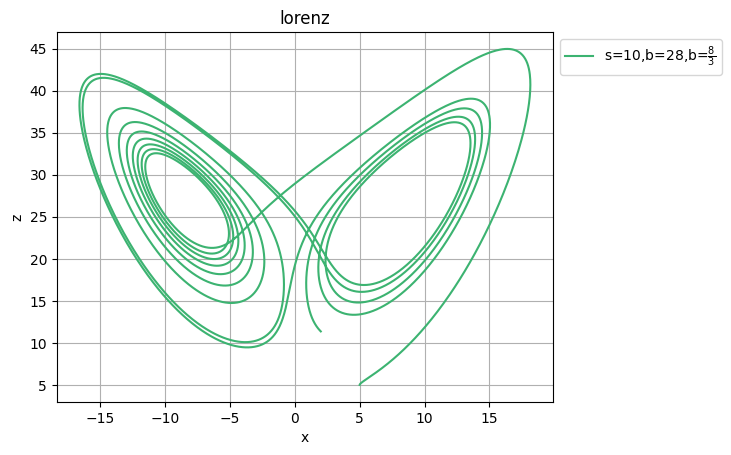

In [ ]:
# lorenz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# matlab eg

# interval, ic # per 6.4.c12
ts = [0,10]
ic = np.array([5,5,5]) # no idea
h = 0.001
n = round((ts[1] - ts[0])/h)
p = n # evaluate n, plot p

# ic, datastore
ds = np.zeros((p+1,1+len(ic)))
ds[0,0] = ts[0]
ds[0,1:len(ic)+1] = ic

# rk4, one-step
def rk4_step(t,w,h):
  s1=ydot(t,w)
  s2=ydot(t+h/2,w+h/2*s1)
  s3=ydot(t+h/2,w+h/2*s2)
  s4=ydot(t+h,w+h*s3)
  rc=w+h*(s1+2*s2+2*s3+s4)/6
  return rc

# f(t,y)
def ydot(t,y):
  s,r,b = 10,28,8/3
  z = np.zeros_like(y)
  z[0] = -s*y[0] + s*y[1]
  z[1] = -y[0]*y[2] + r*y[0]-y[1]
  z[2] = y[0]*y[1] - b*y[2]
  return z

y2=y1=ic
a=ts[0];b=ts[1];h=(b-a)/n # n points to plot
t2=t1=a
for k in range(p):
  for i in range(round(n/p)): # round = lols
    t2 += h
    y2 = rk4_step(t1,y1,h)
    t1,y1 = t2,y2
  ds[k+1,0] = t2
  ds[k+1,1:len(y2)+1] = y2

# dataframe column names
nCol = ["t","x","y","z"]

# dataframe from datastore
df = pd.DataFrame(data=ds,columns=nCol)
if False: # spreadsheet
  #df.style # same as below, yawn
  display(df)

if True: # plot
  ax1  = df.plot(x = "x",y="z",label="s=10,r=28,b=$\\frac{8}{3}$",color="mediumseagreen") #,marker=".")
  ax1.set_title("lorenz")
  ax1.set_xlabel("x")
  ax1.set_ylabel("z")
  ax1.grid('on',which='major',axis='x')
  ax1.grid('on',which='major',axis='y')
  ax1.legend(bbox_to_anchor=(1,1))
  plt.show()